# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [2]:
def apply_svd_custom(X_train, X_test, n_components):
    X_train_mean = np.mean(X_train, axis=0)
    X_test_mean = np.mean(X_test, axis=0)
    
    X_train_centered = X_train - X_train_mean
    X_test_centered = X_test - X_test_mean
    
    covariance_matrix = np.dot(X_train_centered.T, X_train_centered) / X_train_centered.shape[0]
    
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    eigenvalues = np.real(eigenvalues)
    eigenvectors = np.real(eigenvectors)
    
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    selected_eigenvectors = sorted_eigenvectors[:, :n_components]
    
    X_train_reduced = np.dot(X_train_centered, selected_eigenvectors)
    X_test_reduced = np.dot(X_test_centered, selected_eigenvectors)
    
    return X_train_reduced, X_test_reduced, sorted_eigenvalues[:n_components], selected_eigenvectors


## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [4]:
svd_components = [2, 4, 8, 16, 32, 64, 128, 256, 512, 784]  # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd, singular_values, top_singular_vectors = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    
    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time,
        'singular_values': singular_values,
        'top_singular_vectors': top_singular_vectors
    })
    
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 2 components...


c:\Users\Moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 2, Accuracy: 0.4481, Training time: 0.4704 seconds
Applying custom SVD with 4 components...


c:\Users\Moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 4, Accuracy: 0.5760, Training time: 0.6581 seconds
Applying custom SVD with 8 components...


c:\Users\Moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 8, Accuracy: 0.7881, Training time: 0.7235 seconds
Applying custom SVD with 16 components...


c:\Users\Moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 16, Accuracy: 0.8564, Training time: 2.4060 seconds
Applying custom SVD with 32 components...


c:\Users\Moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 32, Accuracy: 0.8980, Training time: 5.9234 seconds
Applying custom SVD with 64 components...


c:\Users\Moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 64, Accuracy: 0.9137, Training time: 16.6152 seconds
Applying custom SVD with 128 components...


c:\Users\Moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 128, Accuracy: 0.9199, Training time: 51.3417 seconds
Applying custom SVD with 256 components...


c:\Users\Moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 256, Accuracy: 0.9210, Training time: 121.1043 seconds
Applying custom SVD with 512 components...


c:\Users\Moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 512, Accuracy: 0.9210, Training time: 304.0523 seconds
Applying custom SVD with 784 components...


c:\Users\Moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9209, Training time: 486.1096 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


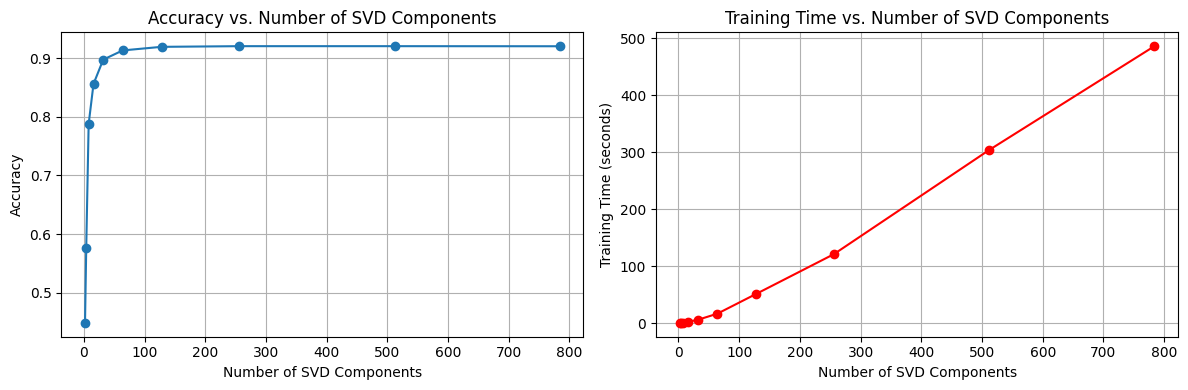

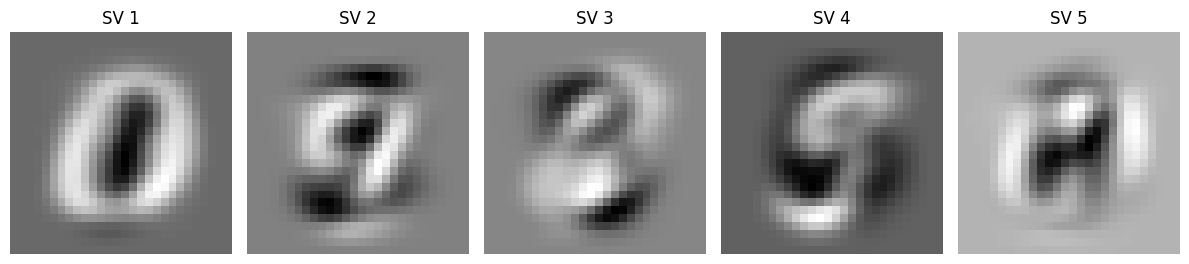

In [5]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization

components = [result['n_components'] for result in results]
accuracies = [result['accuracy'] for result in results]
training_times = [result['training_time'] for result in results]


fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(components, accuracies, marker='o')
axs[0].set_title("Accuracy vs. Number of SVD Components")
axs[0].set_xlabel("Number of SVD Components")
axs[0].set_ylabel("Accuracy")
axs[0].grid(True)

axs[1].plot(components, training_times, marker='o', color='red')
axs[1].set_title("Training Time vs. Number of SVD Components")
axs[1].set_xlabel("Number of SVD Components")
axs[1].set_ylabel("Training Time (seconds)")
axs[1].grid(True)

plt.tight_layout()
plt.show()

top_5_singular_vectors = results[-1]['top_singular_vectors'][:, :5]
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
for i in range(5):
    axes[i].imshow(top_5_singular_vectors[:, i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"SV {i+1}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


## Part 6: Analyze / Conclusion 

YOUR ANSWER: The results show that using Singular Value Decomposition (SVD) on the MNIST dataset strikes a good balance between accuracy and training time. As we increase the number of SVD components, the accuracy of the logistic regression model jumps quickly, especially up to around 128 components, where it levels off near 0.9. Beyond that, adding more components doesn't make much difference in performance. However, training time increases a lot as the number of components grows, especially after 100 components, and becomes pretty slow when using all 784 components. This tells us that while more components hold more information, the time it takes to train the model can be too costly. The top singular vectors we visualized show that the most important patterns, like shapes and strokes of the digits, are captured early on. So, using SVD reduces the data size effectively without losing much accuracy, and it seems that using about 128 components gives a good mix of speed and performance for this dataset.